In [ ]:
import os
from glob import glob
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import earthpy.io as eio
import cv2

In [ ]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
# For reading files
import rasterio as rio

# For visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

# For Summary and Analysis
import numpy as np
import pandas as pd
from scipy import stats

np.seterr(divide='ignore', invalid='ignore')



{'divide': 'ignore', 'invalid': 'ignore', 'over': 'warn', 'under': 'ignore'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Analyze pixel count for each image

In [ ]:
## Analyze pixel count for each image

from IPython.core.display import Image
def pixel_info(path,date_list):
    height = []
    width = []
    label = []
    for folder in os.listdir(path):
      #non-flood
      if folder[-8:] in date_list:
        print(folder[-8:])
        for i in os.listdir(path + folder + "/"):
            if i == 'files':
              for image in os.listdir(path + folder + "/" + i + "/" ):
  
                if image[-36:] == '3B_AnalyticMS_SR_harmonized_clip.tif' or image[-18:] == '3B_Visual_clip.tif':
                    satdat = rio.open(path + folder + "/" + i + "/" + image)
                    width_in_projected_units = satdat.bounds.right - satdat.bounds.left
                    height_in_projected_units = satdat.bounds.top - satdat.bounds.bottom
                    width.append(width_in_projected_units)
                    height.append(height_in_projected_units)
    return height, width

In [ ]:
newpath = '/content/drive/MyDrive/KPMG Practicum/PlanetData/dataset/'
date_list = ['20180816',
'20180319',
'20200622',
'20200219',
'20200206',
'20201011',
'20201211',
'20200828',
'20211230',
'20210604']
# '20171105','20191013','20191001','20171007'
label_date_list= ['20171105']
height, width = pixel_info(newpath,label_date_list)

20171105


Text(0.5, 1.0, 'Image Sizes (pixels) - Flood')

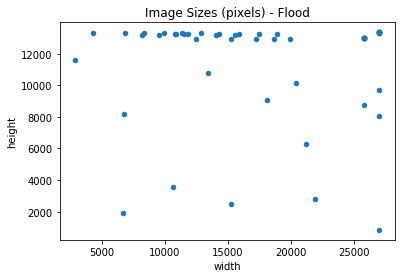

In [ ]:
dim_df = pd.DataFrame()
dim_df['width']=width
dim_df['height']=height
#dim_df.head()
sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
sizes.plot.scatter(x='width', y='height');
plt.title('Image Sizes (pixels) - Flood')

In [ ]:
#non flood CeceGu_20210309
height_nonflood, width_nonflood = pixel_info(newpath,'CeceGu_20210309')

20210309


Text(0.5, 1.0, 'Image Sizes (pixels) - Non Flood')

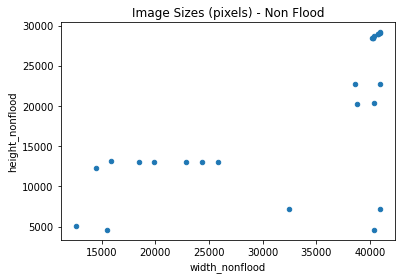

In [ ]:
dim_df = pd.DataFrame()
dim_df['width_nonflood']=width_nonflood
dim_df['height_nonflood']=height_nonflood
#dim_df.head()
sizes = dim_df.groupby(['height_nonflood', 'width_nonflood']).size().reset_index().rename(columns={0:'count'})
sizes.plot.scatter(x='width_nonflood', y='height_nonflood');
plt.title('Image Sizes (pixels) - Non Flood')

# Extracting metadata information from a satellite image

>  Data

*  Non-flood: 20200206

*Read the image in Rasterio:*


In [ ]:
import rasterio
from matplotlib import pyplot as plt

# This notebook explores a single 4 band (blue, green, red, NIR) PlanetScope scene in a UTM projection.
image_file_1= "/content/drive/MyDrive/assignment/20191014_143330_100d_3B_AnalyticMS_SR_harmonized_clip.tif"

plt.imshow(image_file_1)

# Use Rasterio to open the image.
satdat_20200206 = rasterio.open(image_file_1)

> Basic Attributes Data

*Number of Bands*

In [ ]:
print(satdat_20200206)


## number of bands in this dataset
print(satdat_20200206.count)

# And provides a sequence of band indexes.  These are one indexing, not zero indexing like Numpy arrays.
print(satdat_20200206.indexes)

<open DatasetReader name='/content/drive/MyDrive/assignment/20191014_143330_100d_3B_AnalyticMS_SR_harmonized_clip.tif' mode='r'>
4
(1, 2, 3, 4)


*Dimensions*

In [ ]:
# Get dimensions, in map units (using the example GeoTIFF, that's meters)

width_in_projected_units = satdat_20200206.bounds.right - satdat_20200206.bounds.left
height_in_projected_units = satdat_20200206.bounds.top - satdat_20200206.bounds.bottom

print("Width: {}, Height: {}".format(width_in_projected_units, height_in_projected_units))

Width: 20202.0, Height: 5406.0


*The Dimensions of a single pixel*

In [ ]:
# This dataset's projection uses meters as distance units.  What are the dimensions of a single pixel in meters?

xres = (satdat_20200206.bounds.right - satdat_20200206.bounds.left) / satdat_20200206.width
yres = (satdat_20200206.bounds.top - satdat_20200206.bounds.bottom) / satdat_20200206.height

print(xres, yres)
print("Are the pixels square: {}".format(xres == yres))

3.0 3.0
Are the pixels square: True


*Number of rows and columns*

In [ ]:
# Number of rows and columns.

print("Rows: {}, Columns: {}".format(satdat_20200206.height, satdat_20200206.width))

Rows: 1802, Columns: 6734


*Coordinate reference system*

In [ ]:
# Get coordinate reference system

satdat_20200206.crs

CRS.from_epsg(32617)

In [ ]:
# Convert pixel coordinates to world coordinates.

# Upper left pixel
row_min = 0
col_min = 0

# Lower right pixel.  Rows and columns are zero indexing.
row_max = satdat_20200206.height - 1
col_max = satdat_20200206.width - 1

# Transform coordinates with the dataset's affine transformation.
topleft = satdat_20200206.transform * (row_min, col_min)
botright = satdat_20200206.transform * (row_max, col_max)

print("Top left corner coordinates: {}".format(topleft))
print("Bottom right corner coordinates: {}".format(botright))

Top left corner coordinates: (519438.0, 2785620.0)
Bottom right corner coordinates: (524841.0, 2765421.0)


In [ ]:
# All of the metadata required to create an image of the same dimensions, datatype, format, etc. is stored in
# the dataset's profile:

satdat_20200206.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 6734, 'height': 1802, 'count': 4, 'crs': CRS.from_epsg(32617), 'transform': Affine(3.0, 0.0, 519438.0,
       0.0, -3.0, 2785620.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}

# Visualization



> 4 bands



*Subset each band*

In [ ]:
# scale values for display purposes
def scale(band):
    return band / 10000.0

# Load the bands into numpy arrays
# Note that PlanetScope band order is BGRN
blue = scale(satdat_20200206.read(1))
green = scale(satdat_20200206.read(2))
red = scale(satdat_20200206.read(3))
nir = scale(satdat_20200206.read(4))

or

In [ ]:
band_1, band_2, band_3, band_4 = satdat_20200206.read()

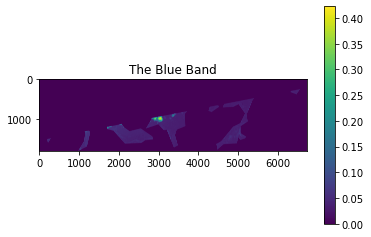

In [ ]:
# Use imshow to load the blue band.
fig = plt.imshow(blue)

# Display the results.
plt.title("The Blue Band")
plt.colorbar()
plt.show()

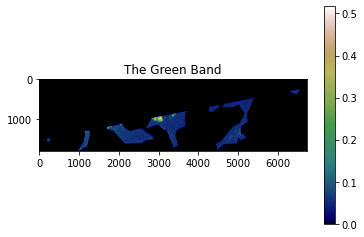

In [ ]:
# Plot the green band using a non-default color ramp.
# https://matplotlib.org/users/colormaps.html
fig = plt.imshow(green)
fig.set_cmap('gist_earth')

# Display the results.
plt.title("The Green Band")
plt.colorbar()
plt.show()

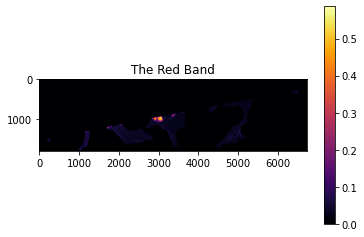

In [ ]:
# Plot the red band.

fig = plt.imshow(red)
fig.set_cmap('inferno')
plt.colorbar()

# Display the results.
plt.title("The Red Band")
plt.show()

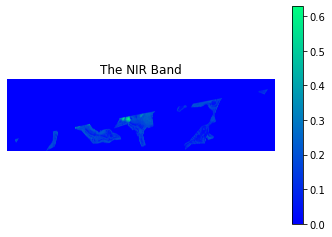

In [ ]:
# Finally, plot the NIR band.
fig = plt.imshow(nir)
fig.set_cmap('winter')
plt.colorbar()

# Since the axis labels are useless here, let's turn them off.
plt.axis('off')

# Display the results.
plt.title("The NIR Band")
plt.show()



> Displaying Composite Imagery



Creating different composites by arranging bands in different order often help us better visualize and examine patterns. Two of the most commonly used composites:  


*   The True
*   The False (Color Infrared)



In [ ]:
# Use numpy to create two stacks of bands:
import numpy
true_color = numpy.dstack((red, green, blue))
color_infrared = numpy.dstack((nir,red,green))

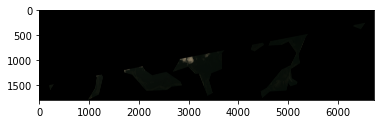

In [ ]:
# plot the RGB stack to see a true-color representation
plt.imshow(true_color)

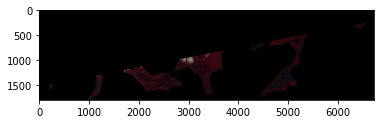

In [ ]:
# use the NRG stack to display a false-color composite, highlighting vegetation
# in clipped.tif, the grassy Presidio and Golden Gate Park become easy to spot
plt.imshow(color_infrared)

# Using matplotlib to plot a histogram of pixel values

> Blue



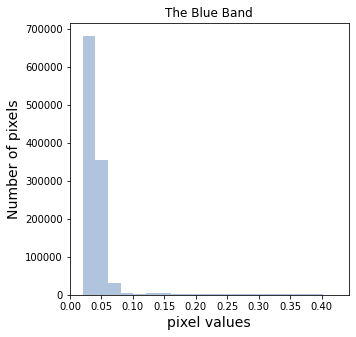

In [ ]:
# Define a new figure
fig2 = plt.figure(figsize=(5,5))

# Give this new figure a subplot, which will contain the histogram itself
ax = fig2.add_subplot(111)

# Add a title & (x,y) labels to the plot
plt.title("Histogram Example", fontsize=18, fontweight='bold')
plt.xlabel("pixel values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)

# let's plot non-null blue band values as an example
# For the x-axis, we want to count every pixel that has a value
x = blue[numpy.not_equal(blue, satdat_20200206.nodata)]

# Define the number of bins to divide the data into
bins = 20

# Define a color for the histogram
# You can use https://matplotlib.org/2.0.0/examples/color/named_colors.html as a reference
color = 'lightsteelblue'

# call 'hist` with our x-axis, bins, and color details
ax.hist(x,bins,color=color)

# Save the generated figure to an external image file
fig2.savefig("histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

# Finally - let's take a look!
plt.title("The Blue Band")
plt.show()


> Green





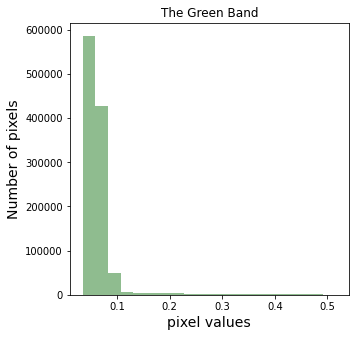

In [ ]:
# Define a new figure
fig3 = plt.figure(figsize=(5,5))

# Give this new figure a subplot, which will contain the histogram itself
ax = fig3.add_subplot(111)

# Add a title & (x,y) labels to the plot
plt.title("Histogram Example", fontsize=18, fontweight='bold')
plt.xlabel("pixel values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)

# let's plot non-null green band values as an example
# For the x-axis, we want to count every pixel that has a value
g = green[numpy.not_equal(green, satdat_20200206.nodata)]

# Define the number of bins to divide the data into
bins = 20

# Define a color for the histogram
# You can use https://matplotlib.org/2.0.0/examples/color/named_colors.html as a reference
color = 'darkseagreen'

# call 'hist` with our x-axis, bins, and color details
ax.hist(g,bins,color=color)

# Save the generated figure to an external image file
fig3.savefig("histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

# Finally - let's take a look!
plt.title("The Green Band")
plt.show()



> Red



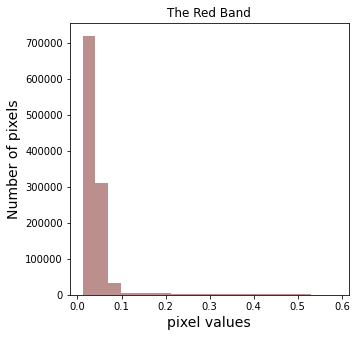

In [ ]:
# Define a new figure
fig4 = plt.figure(figsize=(5,5))

# Give this new figure a subplot, which will contain the histogram itself
ax = fig4.add_subplot(111)

# Add a title & (x,y) labels to the plot
plt.title("Histogram Example", fontsize=18, fontweight='bold')
plt.xlabel("pixel values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)

# let's plot non-null red band values as an example
# For the x-axis, we want to count every pixel that has a value
x = red[numpy.not_equal(red, satdat_20200206.nodata)]

# Define the number of bins to divide the data into
bins =20

# Define a color for the histogram
# You can use https://matplotlib.org/2.0.0/examples/color/named_colors.html as a reference
color = 'rosybrown'

# call 'hist` with our x-axis, bins, and color details
ax.hist(x,bins,color=color)

# Save the generated figure to an external image file
fig4.savefig("histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

# Finally - let's take a look!
plt.title("The Red Band")
plt.show()

## non-flood

In [ ]:
import rasterio
from matplotlib import pyplot as plt

# This notebook explores a single 4 band (blue, green, red, NIR) PlanetScope scene in a UTM projection.
image_non_flood= "/content/drive/MyDrive/assignment/20191014_143330_100d_3B_AnalyticMS_SR_harmonized_clip.tif"

# Use Rasterio to open the image.
satdat_20191014 = rasterio.open(image_non_flood)

In [ ]:
# Get dimensions, in map units (using the example GeoTIFF, that's meters)

width_in_projected_units = satdat_20191014.bounds.right - satdat_20191014.bounds.left
height_in_projected_units = satdat_20191014.bounds.top - satdat_20191014.bounds.bottom

print("Width: {}, Height: {}".format(width_in_projected_units, height_in_projected_units))

Width: 20202.0, Height: 5406.0


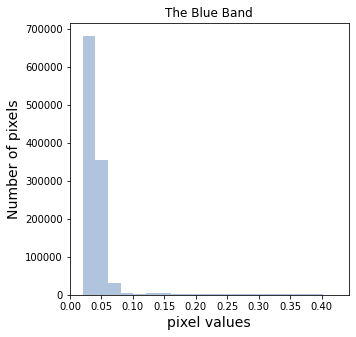

In [ ]:
# Define a new figure
fig2_non_flood = plt.figure(figsize=(5,5))

# Give this new figure a subplot, which will contain the histogram itself
ax = fig2_non_flood.add_subplot(111)

# Add a title & (x,y) labels to the plot
plt.title("Histogram Example", fontsize=18, fontweight='bold')
plt.xlabel("pixel values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)

# let's plot non-null blue band values as an example
# For the x-axis, we want to count every pixel that has a value
x = blue[numpy.not_equal(blue, satdat_20191014.nodata)]

# Define the number of bins to divide the data into
bins = 20

# Define a color for the histogram
# You can use https://matplotlib.org/2.0.0/examples/color/named_colors.html as a reference
color = 'lightsteelblue'

# call 'hist` with our x-axis, bins, and color details
ax.hist(x,bins,color=color)

# Save the generated figure to an external image file
fig2_non_flood.savefig("histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

# Finally - let's take a look!
plt.title("The Blue Band")
plt.show()

## rest of the code

In [ ]:
import rasterio

#filename = "/content/drive/MyDrive/assignment/20191014_143330_100d_3B_AnalyticMS_SR_harmonized_clip.tif"
filename = '/content/drive/MyDrive/assignment/20210309_154122_1010_3B_AnalyticMS_SR_harmonized_clip.tif'
#/content/drive/MyDrive/assignment/20210309_154122_1010_3B_AnalyticMS_SR_harmonized_clip.tif"

# Load red and NIR bands - note all PlanetScope 4-band images have band order BGRN
with rasterio.open(filename) as src:
    band_red = src.read(3)

with rasterio.open(filename) as src:
    band_nir = src.read(4)

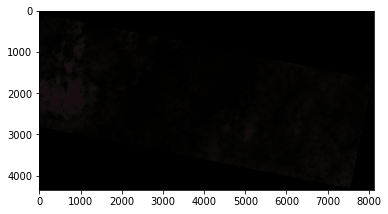

In [ ]:
flood_event = cv2.imread('/content/drive/MyDrive/assignment/20210309_154122_1010_3B_AnalyticMS_SR_harmonized_clip.tif')
plt.imshow(flood_event)

In [ ]:
# allow division by zero without throwing a warning
import numpy
numpy.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI - remember, bands read via rasterio are just numpy arrays
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)

In [ ]:
# check range NDVI values, excluding NaN
print(numpy.nanmin(ndvi)) 
print(numpy.nanmax(ndvi))

-0.9937694704049844
0.8768241404897353


In [ ]:
# get the metadata of original GeoTIFF:
meta = src.meta
print(meta)

# get the dtype of our NDVI array:
ndvi_dtype = ndvi.dtype
print(ndvi_dtype)

# set the source metadata as kwargs we'll use to write the new data:
kwargs = meta

# update the 'dtype' value to match our NDVI array's dtype:
kwargs.update(dtype=ndvi_dtype)

# update the 'count' value since our output will no longer be a 4-band image:
kwargs.update(count=1)

# Finally, use rasterio to write new raster file 'data/ndvi.tif':
with rasterio.open('/content/ndvi.tif', 'w', **kwargs) as dst:
        dst.write(ndvi, 1)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 8129, 'height': 4344, 'count': 4, 'crs': CRS.from_epsg(32617), 'transform': Affine(3.0, 0.0, 512739.0,
       0.0, -3.0, 2835144.0)}
float64


In [ ]:
from matplotlib import colors

# Credit: Joe Kington
class MidpointNormalize(colors.Normalize):
    """
    Normalize the colorbar so that diverging bars work there way either side from a prescribed midpoint value
    
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return numpy.ma.masked_array(numpy.interp(value, x, y), numpy.isnan(value))

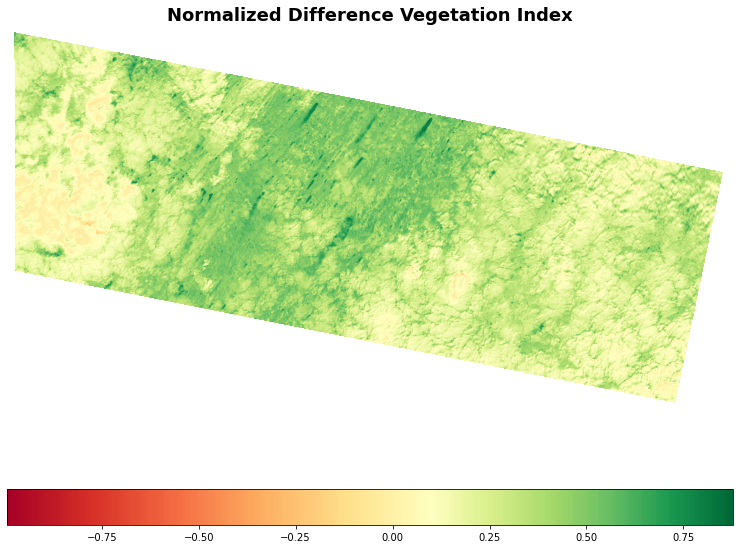

In [ ]:
# Begin by pulling in pyplot
import matplotlib.pyplot as plt

# Set min/max values from NDVI range for image
# HINT: refer back to earlier, when we verified our min & max values were within expected range
min=numpy.nanmin(ndvi)
max=numpy.nanmax(ndvi)

# Set our custom midpoint for most effective NDVI analysis
mid=0.1

# Set your favorite diverging color scheme 
# You can use https://matplotlib.org/users/colormaps.html as a reference
colormap = plt.cm.RdYlGn 

# Call MidPointNormalize with our min, max, and custom midpoint
norm = MidpointNormalize(vmin=min, vmax=max, midpoint=mid)

# Create a pyplot figure, in which we'll display our colorized NDVI
fig = plt.figure(figsize=(20,10))

# Add a subplot to our figure, which will contain the colorbar
ax = fig.add_subplot(111)

# Use 'imshow' to specify the input data, colormap, min, max, and norm for the colorbar
cbar_plot = ax.imshow(ndvi, cmap=colormap, vmin=min, vmax=max, norm=norm)

# Turn off the display of axis labels 
ax.axis('off')

# Set a title 
ax.set_title('Normalized Difference Vegetation Index', fontsize=18, fontweight='bold')

# Configure the colorbar
cbar = fig.colorbar(cbar_plot, orientation='horizontal', shrink=0.65)

# Call 'savefig' to save this plot to an image file
fig.savefig("/content/ndvi-fig.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

# Finally - let's take a look!
plt.show()

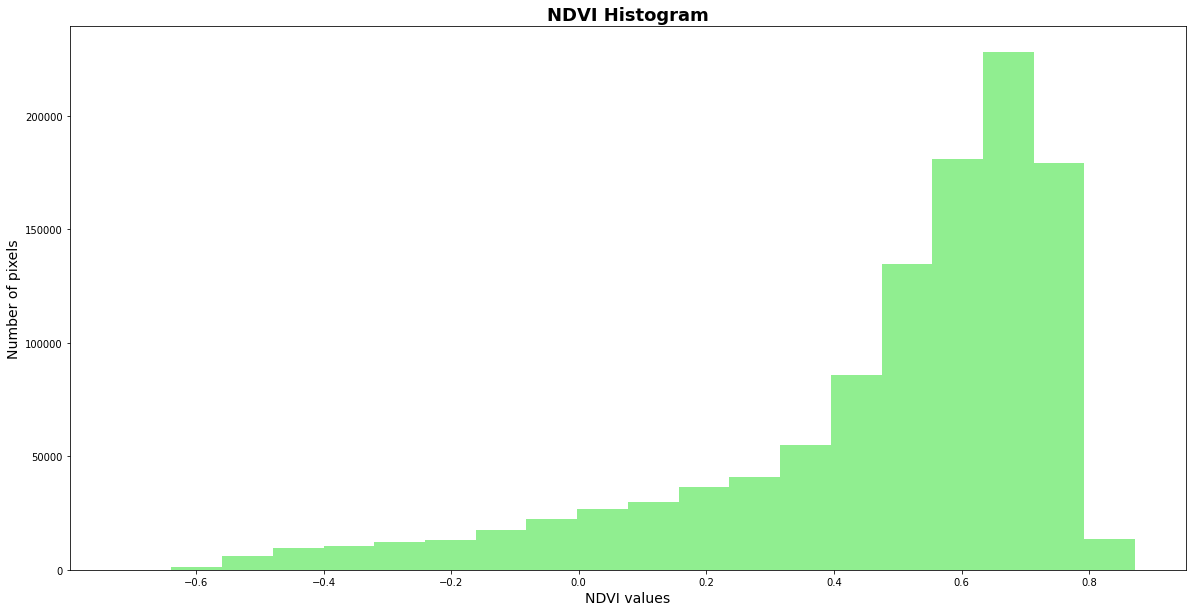

In [ ]:
# Define a new figure
fig2 = plt.figure(figsize=(20,10))

# Give this new figure a subplot, which will contain the histogram itself
ax = fig2.add_subplot(111)

# Add a title & (x,y) labels to the plot
plt.title("NDVI Histogram", fontsize=18, fontweight='bold')
plt.xlabel("NDVI values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)


# For the x-axis, we want to count every pixel that is not an empty value
x = ndvi[~numpy.isnan(ndvi)]

# Define the number of bins to divide the data into
bins = 20

# Define a color for the histogram
# You can use https://matplotlib.org/2.0.0/examples/color/named_colors.html as a reference
color = 'lightgreen'

# call 'hist` with our x-axis, bins, and color details
ax.hist(x,bins,color=color)

# Save the generated figure to an external image file
fig2.savefig("/content/ndvi-histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

# Finally - let's take a look!
plt.show()

# Descriptive Statistics

In [ ]:
# For reading files
from osgeo import gdal
import rasterio

# For visualization
%matplotlib inline
import pylab
import matplotlib.pyplot as plt
from rasterio import plot
from rasterio.plot import show

# For Summary and Analysis
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [ ]:
# flood
#image_data = gdal.Open(r"/content/drive/MyDrive/assignment/20191014_143330_100d_3B_AnalyticMS_SR_harmonized_clip.tif")
#filename = "/content/drive/MyDrive/assignment/20191014_143330_100d_3B_AnalyticMS_SR_harmonized_clip.tif"

# nonflood
image_data = gdal.Open(r"/content/drive/MyDrive/assignment/20210309_154122_1010_3B_AnalyticMS_SR_harmonized_clip.tif")



In [ ]:
# Read image as Array
image_data_arr = image_data.ReadAsArray()

In [ ]:
stat_min = [] # Minimum
stat_max = [] # Maximum
stat_ave = [] # Mean
stat_med = [] # Median
stat_P25 = [] # 25 percent quantile
stat_P75 = [] # 75 percent quantile
stat_var = [] # Variance
stat_std = [] # Standard Deviation

# put all in one list
stat_all = [stat_min, stat_max, stat_ave, stat_P25, stat_P75, stat_med, stat_var, stat_std]

In [ ]:
# Calcualate and append value to lists
for i in image_data_arr:
    mn =i.min() # minimum
    stat_min.append(mn)
    mx = i.max() #maximum
    stat_max.append(mx)
    av = i.mean() #Average
    stat_ave.append(av)
    p25 = np.percentile(i, 25) #1st quantile
    stat_P25.append(p25)
    md = np.median(i)# median
    stat_med.append(md)
    p75 = np.percentile(i, 75) # 3rd quantile
    stat_P75.append(p75)
    va = i.var() # variance
    stat_var.append(va)
    st = i.std() # standard deviation
    stat_std.append(st)

# Rename Column and Row headers
stat_summary = pd.DataFrame(data =stat_all,
            index = ['Minimum','Maximum','Mean','25th Quantile','Median',
                     '75th Quantile','Variance','Standard Deviation'],
            columns = ['Band 1', 'Band 2', 'Band 3','Band 4'])

stat_summary.round(3)

,Band 1,Band 2,Band 3,Band 4
Minimum,0.000,0.000,0.000,0.000
Maximum,5343.000,3895.000,6596.000,9910.000
Mean,608.616,718.594,877.746,1467.150
25th Quantile,0.000,0.000,0.000,0.000
Median,881.000,1113.000,1311.000,2361.000
75th Quantile,359.000,487.000,617.000,1629.000
Variance,692246.187,729589.625,1254269.942,2015638.135
Standard Deviation,832.013,854.160,1119.942,1419.732


In [ ]:
non_flood = rasterio.open('/content/drive/MyDrive/assignment/20210309_154122_1010_3B_AnalyticMS_SR_harmonized_clip.tif')

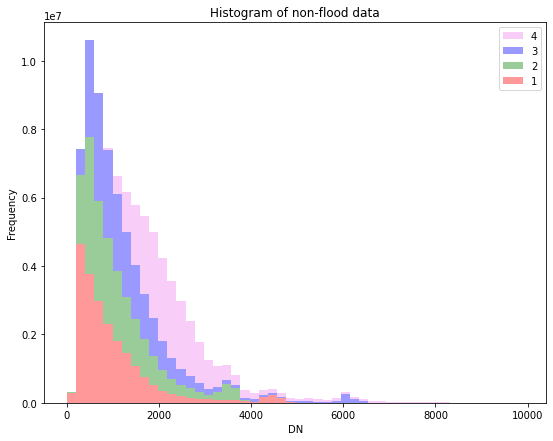

In [ ]:
fig, ax = plt.subplots(1, figsize=(9, 7))
ax.grid(linestyle='None')
plot.show_hist(non_flood, bins=50, lw=2.0,
               stacked=True, alpha=0.4,
               histtype='stepfilled', ax=ax)
plt.title("Histogram of non-flood data")
plt.show()

Normality Test

In [ ]:
Skewness = np.mean(stats.skew(image_data_arr))
Kurtosis = np.mean(stats.kurtosis(image_data_arr))
Shapiro_test = stats.shapiro(image_data_arr)
print(Skewness)
print(Kurtosis)
print(Shapiro_test)

-0.1052331222224151
-2.6030002889375923
(0.5311616659164429, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


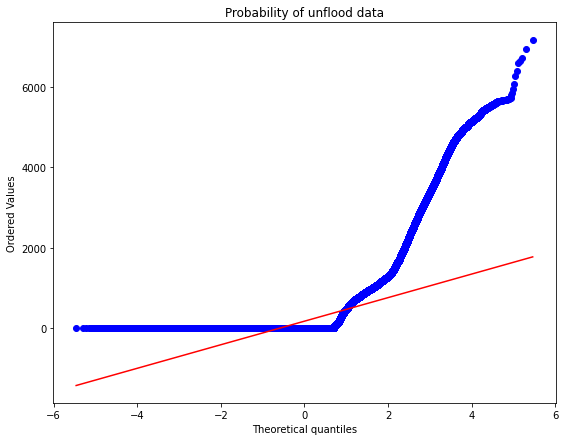

In [ ]:
fig, ax = plt.subplots(1, figsize=(9, 7))
image_data_arr32 = image_data_arr.astype(np.float32)
image_data_flatten= image_data_arr32.flatten()
stats.probplot(image_data_flatten, dist="norm", plot=pylab)
pylab.title("Probability plot of unflood data")
pylab.show()

Measures of Dispersion

In [ ]:
# Reshaping dimension

# get the format of the orignial data
n_samples, nx, ny = image_data_arr.shape

# reshape the three dimension to two
image_data_arr_2_dim= image_data_arr.reshape(n_samples, nx*ny)

In [ ]:
# Calcuate covariance
cov_mat = np.cov(image_data_arr_2_dim)

# Create dataframe and rename headers
covMat_Df = pd.DataFrame(data = cov_mat,
                         index = ['Band 1','Band 2','Band 3','Band 4'],
                         columns = ['Band 1', 'Band 2', 'Band 3','Band 4'])
# Round values to 3
covMat_Df.round(3)

,Band 1,Band 2,Band 3,Band 4
Band 1,209693.993,222754.899,164775.320,99836.104
Band 2,222754.899,238054.761,178576.771,110342.187
Band 3,164775.320,178576.771,143605.124,99814.740
Band 4,99836.104,110342.187,99814.740,90728.438


Correlation

In [ ]:
# Calcualte correlation
d_corr = np.corrcoef(image_data_arr_2_dim)

# Create data frame and rename headers
corMat_Df = pd.DataFrame(data = d_corr,
                         index = ['Band 1','Band 2','Band 3','Band 4'],
                         columns = ['Band 1', 'Band 2', 'Band 3','Band 4'])
corMat_Df = corMat_Df.round(3)
print(corMat_Df)

        Band 1  Band 2  Band 3  Band 4
Band 1   1.000   0.997   0.950   0.724
Band 2   0.997   1.000   0.966   0.751
Band 3   0.950   0.966   1.000   0.874
Band 4   0.724   0.751   0.874   1.000


In [ ]:
corMat_Df.corr()

,Band 1,Band 2,Band 3,Band 4
Band 1,1.000000,0.998730,0.840100,-0.933078
Band 2,0.998730,1.000000,0.866028,-0.914064
Band 3,0.840100,0.866028,1.000000,-0.588835
Band 4,-0.933078,-0.914064,-0.588835,1.000000


Text(0.5, 1.0, 'Correlation Heatmap of nonflood date')

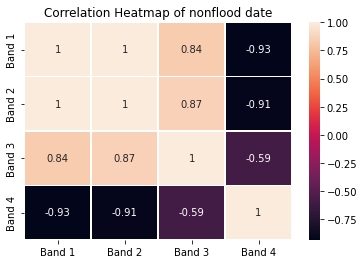

In [ ]:
heatmap = sns.heatmap(corMat_Df.corr(), annot=True,linewidths=.5)
heatmap.set_title('Correlation Heatmap of nonflood date')